# EXPLORATORY ANALYSIS FOR NEW MICROSOFT MOVIE STUDIO.

In this project i will use data from different sets to analyse how the company will open up a movie studio  that will help it breakthrough in the content making industry.The report will analyse the indusrty so that it will solve questions based  on the genre to invest the budget to use what categories are storming the market and delivery of content to the people.


In [2]:
import pandas as pd
import numpy as np
import sqlite3


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

After loading the required libraries to solve our challenge at hand we are required to solve the problem. but we have a lot of data and we need to clean it and remove missing values and null values from each of the data sets so that when we perfom our analysis the process will be smooth and fast and the outpuut will be accurate. this begins by loading all the data sets and assigning them new variable names.

we began with the sql data

In [3]:
connection = None
try:
    # Attempted to establish a connection to the SQLite database
    connection = sqlite3.connect('im.db')  

    # Query to join the tables using movie_id
    query = """
    SELECT *
    FROM directors
    """

    # Using  Pandas to read the query result into a DataFrame
    sql_imdb_data = pd.read_sql_query(query, connection)

except sqlite3.Error as e:
    print(f"SQLite Error: {e}")
    
finally:
   
    if connection:
        connection.close()

sql_imdb_data.head(5)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [4]:
production_data=pd.read_csv('tmdb.movies.csv')
production_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:

movie_cost=pd.read_csv('tn.movie_budgets.csv') 
movie_cost.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:

#coerce error solved from google to allow my code to run
movie_cost["worldwide_gross"] = movie_cost["worldwide_gross"].str.replace("$", "")
movie_cost["worldwide_gross"] = pd.to_numeric(movie_cost["worldwide_gross"], errors="coerce")



In [7]:
movie_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   object 
 4   domestic_gross     5782 non-null   object 
 5   worldwide_gross    380 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 271.2+ KB


In [8]:
print(movie_cost["worldwide_gross"].dtype)


float64


In [9]:
film_info=pd.read_csv('rt.movie_info.tsv', sep='\t')
film_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
#sought extrenal encoding to allow code to function
films_ratings=pd.read_csv('rt.reviews.tsv',delimiter='\t',encoding='ISO-8859-1')
films_ratings.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [11]:
reels_born = pd.read_csv('bom.movie_gross.csv')
reels_born

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


the first  query to review will be 
the best time to release a movie when was the veiwership the most

In [12]:
# first i begin by analysing the  movie_cost to clean and remove messy data
movie_cost

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",NaN
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",NaN
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",NaN
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,0.0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482",NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338",NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,0.0


In [13]:
column_data_types = movie_cost.dtypes
print(column_data_types)

id                     int64
release_date          object
movie                 object
production_budget     object
domestic_gross        object
worldwide_gross      float64
dtype: object


In [14]:
#check for null values
is_null_movie_cost = movie_cost.isnull()
is_null_movie_cost

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
5777,False,False,False,False,False,False
5778,False,False,False,False,False,True
5779,False,False,False,False,False,True
5780,False,False,False,False,False,False


In [15]:
# check for duplicate values
duplicate_values=movie_cost['movie'].duplicated()
duplicate_values

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Name: movie, Length: 5782, dtype: bool

In [16]:
#clean  the reels_data
reels_born.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:

column_data_types = reels_born.dtypes
print(column_data_types)

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [18]:
#check for null data
is_null_reels_born = reels_born.isnull()
is_null_reels_born


,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [19]:
#rename the title column to create a merge
reels_born = reels_born.rename(columns={'title': 'movie'})
reels_born

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [20]:
#creatimg  a merge

movie_cost_and_reels_born = movie_cost.merge(reels_born, on="movie", how="inner")


movie_cost_and_reels_born.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",NaN,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",NaN,BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",NaN,BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295",NaN,WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175",NaN,Sony,200100000.0,680600000,2015


In [21]:
column_data_types = movie_cost_and_reels_born.dtypes
print(column_data_types)

id                     int64
release_date          object
movie                 object
production_budget     object
domestic_gross_x      object
worldwide_gross      float64
studio                object
domestic_gross_y     float64
foreign_gross         object
year                   int64
dtype: object


In [22]:
#drop columns 
movie_cost_and_reels_born=movie_cost_and_reels_born.drop(['domestic_gross_y', 'foreign_gross'], axis=1)

In [23]:
movie_cost_and_reels_born.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,studio,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",NaN,BV,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",NaN,BV,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",NaN,BV,2018
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295",NaN,WB,2017
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175",NaN,Sony,2015


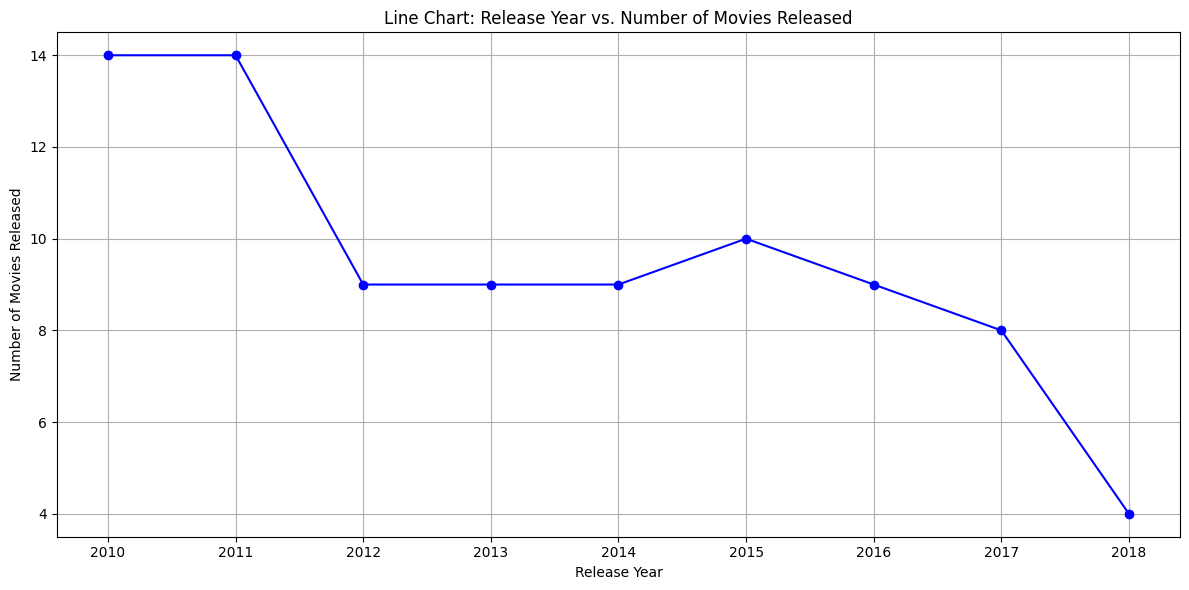

In [24]:


#to plot i had to specify some details first

#merged data_frame
movie_data = pd.read_csv("tn.movie_budgets.csv")
reels_born = pd.read_csv("bom.movie_gross.csv")

# Merge already created in above cells
merged_data = pd.merge(movie_data, reels_born, left_on='movie', right_on='title', how='inner')

#  convert it to datetime
merged_data['release_date'] = pd.to_datetime(merged_data['release_date'], errors='coerce')

# Extracting  the release year from the 'release_date' column
merged_data['release_year'] = merged_data['release_date'].dt.year

# Calculating the  movie release in each year
release_year_counts = merged_data['release_year'].value_counts().sort_index()

# Creating  a line chart
plt.figure(figsize=(12, 6))
plt.plot(release_year_counts.index, release_year_counts.values, color='blue', marker='o', linestyle='-')
plt.xlabel("Release Year")
plt.ylabel("Number of Movies Released")
plt.title("Line Chart: Release Year vs. Number of Movies Released")
plt.grid(True)
plt.tight_layout()
plt.show()


i used a line chart to show the relationship between the release year and number of movie released as observed the best time to release a movie is in the middle of the year reffered to as summer time so as to create a diversity in the market

for the second analytic i will use data from the tmdb.movies.csv 
 rt.movie_info.tsv
load each table to view them
then perfom the necessary analytics

In [25]:
production_data=pd.read_csv('tmdb.movies.csv')
production_data

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [26]:
#to start cleaning we drop the unamed column
production_data.drop("Unnamed: 0", axis=1, inplace=True)
production_data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [27]:
production_data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [28]:
#check for missing values in the rows
production_data.isna().sum()



genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [29]:
#check for duplicates
duplicated_values=production_data.duplicated()
print(duplicated_values)



0        False
1        False
2        False
3        False
4        False
         ...  
26512    False
26513    False
26514    False
26515    False
26516    False
Length: 26517, dtype: bool


In [30]:
# check the data type
data_types=production_data.dtypes
print(data_types)

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object


using the table i can perfom the following analytics first before merging it with the film_info table
1) get the highest rated film in the data will help me understand the audience preferences   


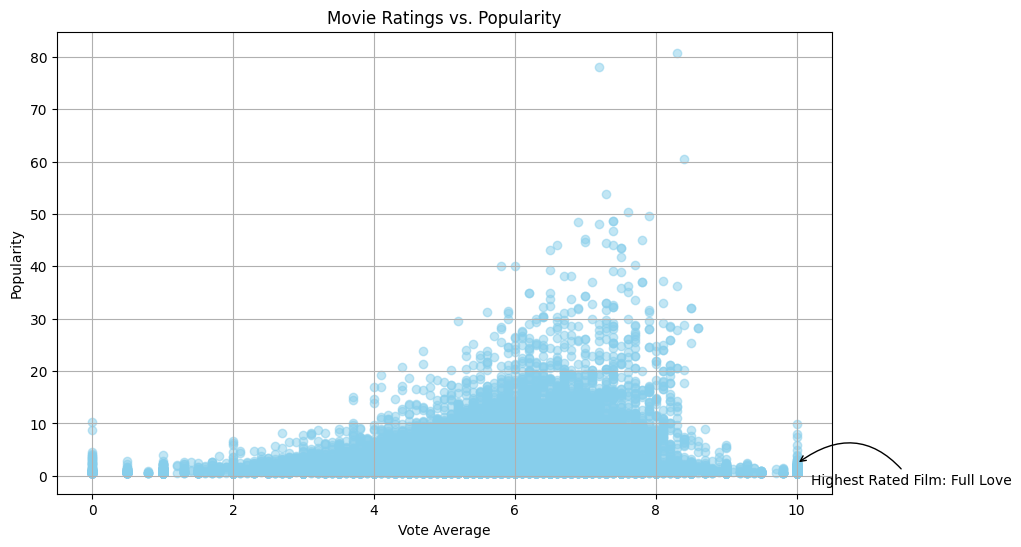

In [40]:


# Converted 'vote_average' to float 
production_data['vote_average'] = production_data['vote_average'].astype(float)

# Finding the highest rated film
highest_rated_film = production_data[production_data['vote_average'] == production_data['vote_average'].max()]

# Create a scatter plot with 'vote_average' on the x-axis and 'popularity' on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(production_data['vote_average'], production_data['popularity'], color='skyblue', alpha=0.5)

# show the highest rated film on the plot
plt.annotate(f'Highest Rated Film: {highest_rated_film["title"].values[0]}', 
             (highest_rated_film['vote_average'].values[0], highest_rated_film['popularity'].values[0]), 
             xytext=(10, -15), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title('Movie Ratings vs. Popularity')

plt.grid(True)

plt.show()



next we look at the data from the rt.reviews.tsv


In [87]:
films_ratings.head()

,id,review,rating,fresh,critic,publisher,date,fresh_numeric,year
0,3,A distinctly gallows take on contemporary fina...,NaN,fresh,PJ Nabarro,Patrick Nabarro,2018-11-10,1,2018
6,3,"Quickly grows repetitive and tiresome, meander...",NaN,rotten,Eric D. Snider,EricDSnider.com,2013-07-17,0,2013
7,3,Cronenberg is not a director to be daunted by ...,NaN,rotten,Matt Kelemen,Las Vegas CityLife,2013-04-21,0,2013
11,3,"While not one of Cronenberg's stronger films, ...",NaN,fresh,Emanuel Levy,EmanuelLevy.Com,2013-02-03,1,2013
12,3,Robert Pattinson works mighty hard to make Cos...,NaN,rotten,Christian Toto,Big Hollywood,2013-01-15,0,2013


In [88]:
films_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35379 entries, 0 to 54424
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             35379 non-null  int64         
 1   review         35379 non-null  object        
 2   rating         651 non-null    float64       
 3   fresh          35379 non-null  object        
 4   critic         34189 non-null  object        
 5   publisher      35152 non-null  object        
 6   date           35379 non-null  datetime64[ns]
 7   fresh_numeric  35379 non-null  int64         
 8   year           35379 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(4)
memory usage: 2.6+ MB


In [90]:
films_ratings=films_ratings.drop(['top_critic'],axis=1)
films_ratings.head()

In [91]:
films_ratings.head()


,id,review,rating,fresh,critic,publisher,date,fresh_numeric,year
0,3,A distinctly gallows take on contemporary fina...,NaN,fresh,PJ Nabarro,Patrick Nabarro,2018-11-10,1,2018
6,3,"Quickly grows repetitive and tiresome, meander...",NaN,rotten,Eric D. Snider,EricDSnider.com,2013-07-17,0,2013
7,3,Cronenberg is not a director to be daunted by ...,NaN,rotten,Matt Kelemen,Las Vegas CityLife,2013-04-21,0,2013
11,3,"While not one of Cronenberg's stronger films, ...",NaN,fresh,Emanuel Levy,EmanuelLevy.Com,2013-02-03,1,2013
12,3,Robert Pattinson works mighty hard to make Cos...,NaN,rotten,Christian Toto,Big Hollywood,2013-01-15,0,2013


In [33]:
#check for rows without values
missing_values=films_ratings.isnull()
print(missing_values)

          id  review  rating  fresh  critic  publisher   date
0      False   False   False  False   False      False  False
6      False   False   False  False   False      False  False
7      False   False   False  False   False      False  False
11     False   False   False  False   False      False  False
12     False   False   False  False   False      False  False
...      ...     ...     ...    ...     ...        ...    ...
54424  False   False   False  False   False      False  False
54428  False    True   False  False   False      False  False
54429  False    True   False  False   False      False  False
54430  False    True   False  False   False      False  False
54431  False    True   False  False   False      False  False

[40915 rows x 7 columns]


In [92]:
# drop the NaN values in the rating column
films_ratings.dropna(subset=['rating'], inplace=True)
films_ratings


,id,review,rating,fresh,critic,publisher,date,fresh_numeric,year
22,3,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,Arkansas Democrat-Gazette,2012-09-07,1,2012
323,10,If all you're looking for is a mild comedy wit...,6.0,rotten,Scott Weinberg,Apollo Guide,2004-03-16,0,2004
342,10,There's probably a sweet little comedy hidden ...,6.0,rotten,Brian Webster,Apollo Guide,2002-06-12,0,2002
430,13,"While it's most certainly not light viewing, a...",8.0,fresh,Brian Webster,Apollo Guide,2007-10-03,1,2007
434,13,I do just what I want to do/ I want everything...,8.0,fresh,Philip Martin,Arkansas Democrat-Gazette,2007-06-29,1,2007
...,...,...,...,...,...,...,...,...,...
53908,1986,...bleakness juxtaposed with bemusement...,3.5,fresh,Josh Larsen,"Sun Publications (Chicago, IL)",2003-06-27,1,2003
54123,1995,"It's shallow, predictable and completely overb...",6.0,rotten,Brian Webster,Apollo Guide,2000-01-01,0,2000
54234,1996,"Dumb and silly and fun, just not as dumb and s...",6.0,rotten,Dan Jardine,Cinemania,2006-08-18,0,2006
54329,1997,"It's not worth the expenditure of energy, really.",5.0,rotten,Scott Renshaw,Apollo Guide,2001-06-13,0,2001


In [93]:
films_ratings.head()

,id,review,rating,fresh,critic,publisher,date,fresh_numeric,year
22,3,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,Arkansas Democrat-Gazette,2012-09-07,1,2012
323,10,If all you're looking for is a mild comedy wit...,6.0,rotten,Scott Weinberg,Apollo Guide,2004-03-16,0,2004
342,10,There's probably a sweet little comedy hidden ...,6.0,rotten,Brian Webster,Apollo Guide,2002-06-12,0,2002
430,13,"While it's most certainly not light viewing, a...",8.0,fresh,Brian Webster,Apollo Guide,2007-10-03,1,2007
434,13,I do just what I want to do/ I want everything...,8.0,fresh,Philip Martin,Arkansas Democrat-Gazette,2007-06-29,1,2007


In [94]:
# drop the NaN values in the review column
films_ratings.dropna(subset=['review'],inplace=True)
films_ratings

,id,review,rating,fresh,critic,publisher,date,fresh_numeric,year
22,3,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,Arkansas Democrat-Gazette,2012-09-07,1,2012
323,10,If all you're looking for is a mild comedy wit...,6.0,rotten,Scott Weinberg,Apollo Guide,2004-03-16,0,2004
342,10,There's probably a sweet little comedy hidden ...,6.0,rotten,Brian Webster,Apollo Guide,2002-06-12,0,2002
430,13,"While it's most certainly not light viewing, a...",8.0,fresh,Brian Webster,Apollo Guide,2007-10-03,1,2007
434,13,I do just what I want to do/ I want everything...,8.0,fresh,Philip Martin,Arkansas Democrat-Gazette,2007-06-29,1,2007
...,...,...,...,...,...,...,...,...,...
53908,1986,...bleakness juxtaposed with bemusement...,3.5,fresh,Josh Larsen,"Sun Publications (Chicago, IL)",2003-06-27,1,2003
54123,1995,"It's shallow, predictable and completely overb...",6.0,rotten,Brian Webster,Apollo Guide,2000-01-01,0,2000
54234,1996,"Dumb and silly and fun, just not as dumb and s...",6.0,rotten,Dan Jardine,Cinemania,2006-08-18,0,2006
54329,1997,"It's not worth the expenditure of energy, really.",5.0,rotten,Scott Renshaw,Apollo Guide,2001-06-13,0,2001


In [95]:
films_ratings

,id,review,rating,fresh,critic,publisher,date,fresh_numeric,year
22,3,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,Arkansas Democrat-Gazette,2012-09-07,1,2012
323,10,If all you're looking for is a mild comedy wit...,6.0,rotten,Scott Weinberg,Apollo Guide,2004-03-16,0,2004
342,10,There's probably a sweet little comedy hidden ...,6.0,rotten,Brian Webster,Apollo Guide,2002-06-12,0,2002
430,13,"While it's most certainly not light viewing, a...",8.0,fresh,Brian Webster,Apollo Guide,2007-10-03,1,2007
434,13,I do just what I want to do/ I want everything...,8.0,fresh,Philip Martin,Arkansas Democrat-Gazette,2007-06-29,1,2007
...,...,...,...,...,...,...,...,...,...
53908,1986,...bleakness juxtaposed with bemusement...,3.5,fresh,Josh Larsen,"Sun Publications (Chicago, IL)",2003-06-27,1,2003
54123,1995,"It's shallow, predictable and completely overb...",6.0,rotten,Brian Webster,Apollo Guide,2000-01-01,0,2000
54234,1996,"Dumb and silly and fun, just not as dumb and s...",6.0,rotten,Dan Jardine,Cinemania,2006-08-18,0,2006
54329,1997,"It's not worth the expenditure of energy, really.",5.0,rotten,Scott Renshaw,Apollo Guide,2001-06-13,0,2001


after the cleaining we will perfom analytics to give us more insights eg :


categorical analysis for the fresh category will help the studio understand the impact of a critics review on their movies.


Time  analysis to help the studio know what content has the highest ratings hence help the studio  in being wise in choosing the correct genre, time to release the movie based on the peaks

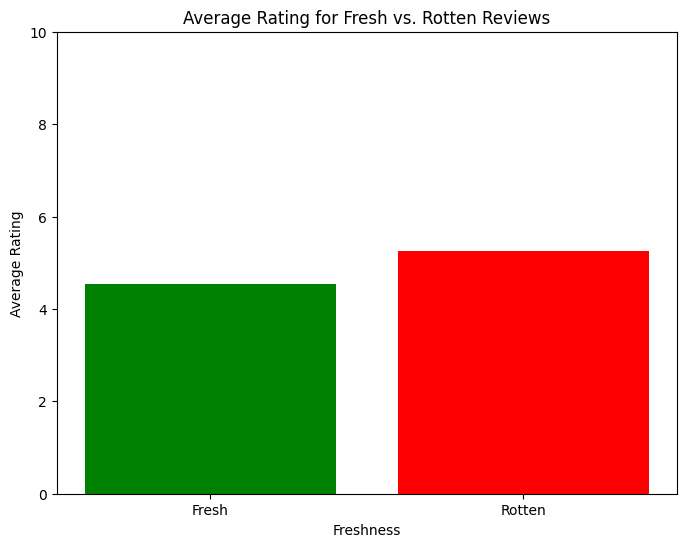

In [96]:
# analytics one to get the impacts of critics on movies
#  I Mapped  'fresh' to numerical values (e.g., 1 for 'fresh' and 0 for 'rotten')
films_ratings['fresh_numeric'] = films_ratings['fresh'].map({'fresh': 1, 'rotten': 0})

# I  Converted 'rating' to a numeric data type
films_ratings['rating'] = pd.to_numeric(films_ratings['rating'], errors='coerce')

# avarage rating
fresh_vs_rotten = films_ratings.groupby('fresh_numeric')['rating'].mean().reset_index()

#  bar chart to compare average ratings for fresh and rotten reviews
plt.figure(figsize=(8, 6))
plt.bar(fresh_vs_rotten['fresh_numeric'], fresh_vs_rotten['rating'], color=['green', 'red'])
plt.xlabel('Freshness')
plt.ylabel('Average Rating')
plt.title('Average Rating for Fresh vs. Rotten Reviews')
plt.xticks(fresh_vs_rotten['fresh_numeric'], ['Fresh', 'Rotten'])
plt.ylim(0, 10) 
plt.show()


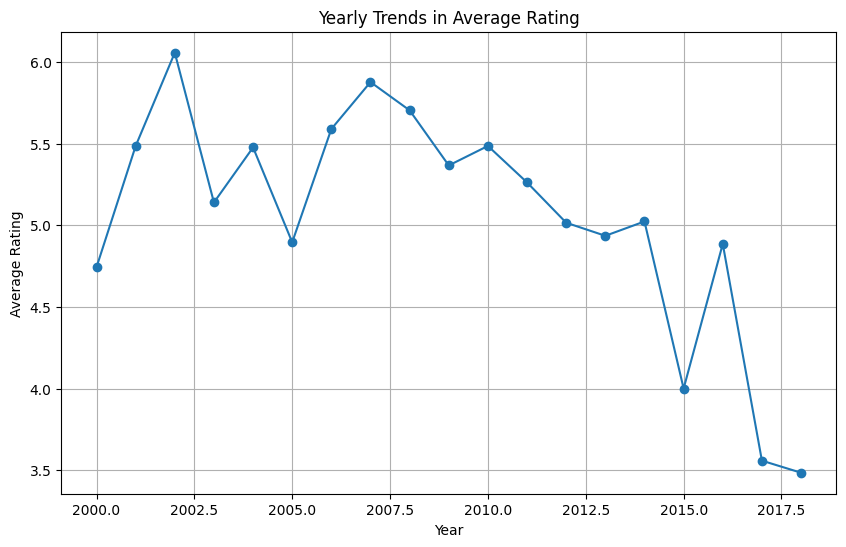

In [97]:


#to understand the yearly trends in average rating
films_ratings['date'] = pd.to_datetime(films_ratings['date'])  # Convert 'date' to datetime format
films_ratings['year'] = films_ratings['date'].dt.year  # Extract the year

#  calculating  the average rating
yearly_avg_rating = films_ratings.groupby('year')['rating'].mean()

#  a line chart to visualize yearly trends in average rating
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_rating.index, yearly_avg_rating.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Yearly Trends in Average Rating')
plt.grid(True)
plt.show()


In [98]:
films_ratings

,id,review,rating,fresh,critic,publisher,date,fresh_numeric,year
22,3,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,Arkansas Democrat-Gazette,2012-09-07,1,2012
323,10,If all you're looking for is a mild comedy wit...,6.0,rotten,Scott Weinberg,Apollo Guide,2004-03-16,0,2004
342,10,There's probably a sweet little comedy hidden ...,6.0,rotten,Brian Webster,Apollo Guide,2002-06-12,0,2002
430,13,"While it's most certainly not light viewing, a...",8.0,fresh,Brian Webster,Apollo Guide,2007-10-03,1,2007
434,13,I do just what I want to do/ I want everything...,8.0,fresh,Philip Martin,Arkansas Democrat-Gazette,2007-06-29,1,2007
...,...,...,...,...,...,...,...,...,...
53908,1986,...bleakness juxtaposed with bemusement...,3.5,fresh,Josh Larsen,"Sun Publications (Chicago, IL)",2003-06-27,1,2003
54123,1995,"It's shallow, predictable and completely overb...",6.0,rotten,Brian Webster,Apollo Guide,2000-01-01,0,2000
54234,1996,"Dumb and silly and fun, just not as dumb and s...",6.0,rotten,Dan Jardine,Cinemania,2006-08-18,0,2006
54329,1997,"It's not worth the expenditure of energy, really.",5.0,rotten,Scott Renshaw,Apollo Guide,2001-06-13,0,2001


In [100]:
films_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, 22 to 54371
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             651 non-null    int64         
 1   review         651 non-null    object        
 2   rating         651 non-null    float64       
 3   fresh          651 non-null    object        
 4   critic         642 non-null    object        
 5   publisher      648 non-null    object        
 6   date           651 non-null    datetime64[ns]
 7   fresh_numeric  651 non-null    int64         
 8   year           651 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(4)
memory usage: 48.3+ KB
